In [14]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import matplotlib.pyplot as plt


In [45]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [46]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


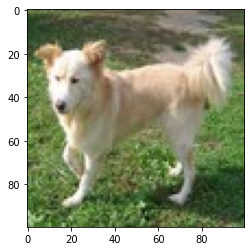

In [47]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

# Model

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPool2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-12-29 19:35:45.776425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-29 19:35:45.776653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/15


2023-12-29 19:50:36.913015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 22ms/step - loss: 0.5606 - accuracy: 0.8005
Epoch 2/15
32/32 [==============================] - 1s 21ms/step - loss: 0.2537 - accuracy: 0.9325
Epoch 3/15
32/32 [==============================] - 1s 20ms/step - loss: 0.1895 - accuracy: 0.9470
Epoch 4/15
32/32 [==============================] - 1s 20ms/step - loss: 0.1451 - accuracy: 0.9655
Epoch 5/15
32/32 [==============================] - 1s 20ms/step - loss: 0.1042 - accuracy: 0.9790
Epoch 6/15
32/32 [==============================] - 1s 20ms/step - loss: 0.0822 - accuracy: 0.9845
Epoch 7/15
32/32 [==============================] - 1s 20ms/step - loss: 0.0636 - accuracy: 0.9895
Epoch 8/15
32/32 [==============================] - 1s 20ms/step - loss: 0.0430 - accuracy: 0.9960
Epoch 9/15
32/32 [==============================] - 1s 20ms/step - loss: 0.0299 - accuracy: 0.9990
Epoch 10/15
32/32 [==============================] - 1s 20ms/step - loss: 0.0219 - accuracy: 0.9995
Epoch 11/15
32/32 [=

In [50]:
model.evaluate(X_test, Y_test)

 6/13 [============>.................] - ETA: 0s - loss: 1.1234 - accuracy: 0.6875

2023-12-29 19:50:59.384572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 13ms/step - loss: 1.2890 - accuracy: 0.6750


[1.2889981269836426, 0.675000011920929]

The actual value is : [0.]
Our model says it is a : cat


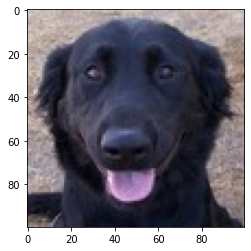

In [137]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
print("The actual value is :", Y_test[idx2])

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)